
<h1 align="center"><font size="5">COVID mobility analysis </font></h1>



<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="background-color:yellow, margin-top: 20px">
    <ul>
    <!-- <li><a href="#Instructions">Instructions</a></li> -->
    <li><a href="#Objectives:">Objective:</a></li>
    <!-- <li><a href="#Module-1:-Importing-Data-Sets">Module 1: Importing Data </a></li> -->
    <li><a href="#Data-Wrangling">Data Wrangling</a> </li>
    <li><a href="#Analyse Specific Routes or Areas">Analyse Specific Routes or Areas</a></li>
</a></li>
</div>
<!-- <p>Estimated Time Needed: <strong>75 min</strong></p> -->
</div>

<hr>

# Objectives:

The government wants to analyse the impact of their social distancing and mobility reduction 
policy that they had put in place during the COVID

In [30]:
# Import necessary libraries
import pandas as pd
import glob
import os

In [77]:
data_folder = r"C:\Users\PC\Documents\Interviews\giga_hiring_challenge\giga_hiring_challenge\mobility_4_test"

In [79]:
# Step 1: Read and Combine Data Files
# Use glob to read all CSV files in the folder
csv_files = glob.glob(os.path.join(data_folder, "*.csv"))

In [81]:
# Create an empty list to store dataframes
dataframes = []

In [83]:
# Loop through each file and load it into a DataFrame
for file in csv_files:
    # Extract the time period from the filename (e.g., day1_0000.csv -> 0000)
    time_period = file.split("_")[-1].replace(".csv", "")
    
    # Read the CSV file
    df = pd.read_csv(file)
    
    # Add a 'Time_Period' column to indicate the time of day
    df['Time_Period'] = time_period
    
    # Append the DataFrame to the list
    dataframes.append(df)

In [85]:
# Combine all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)


# Data Wrangling

In [88]:
# Step 2: Explore the Combined Data
print("First 5 rows of the combined data:")
print(combined_df.head())


First 5 rows of the combined data:
   Unnamed: 0  index  Baseline: People Moving  Crisis: People Moving  \
0           0   7515                14.000000                     30   
1           1   7517                11.000000                     24   
2           2   7519                16.666667                     45   
3           3   7520                14.000000                     31   
4           4   7542                13.000000                     38   

          x0        y0         x1        y1 Time_Period  
0  62.788086  8.425543  62.963867  8.425543        0000  
1  62.788086  8.425543  63.227540  8.256863        0000  
2  62.788086  8.425543  63.315430  8.172468        0000  
3  62.788086  8.425543  63.491210  8.425543        0000  
4  62.788086  9.350634  63.139650  9.350634        0000  


In [92]:
combined_df['Baseline: People Moving'] = combined_df['Baseline: People Moving'].round(0).astype(int)
combined_df.head()

,Unnamed: 0,index,Baseline: People Moving,Crisis: People Moving,x0,y0,x1,y1,Time_Period
0,0,7515,14,30,62.788086,8.425543,62.963867,8.425543,0000
1,1,7517,11,24,62.788086,8.425543,63.227540,8.256863,0000
2,2,7519,17,45,62.788086,8.425543,63.315430,8.172468,0000
3,3,7520,14,31,62.788086,8.425543,63.491210,8.425543,0000
4,4,7542,13,38,62.788086,9.350634,63.139650,9.350634,0000


In [94]:
print("\nSummary of the combined data:")
print(combined_df.info())


Summary of the combined data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14159 entries, 0 to 14158
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               14159 non-null  int64  
 1   index                    14159 non-null  int64  
 2   Baseline: People Moving  14159 non-null  int32  
 3   Crisis: People Moving    14159 non-null  int64  
 4   x0                       14159 non-null  float64
 5   y0                       14159 non-null  float64
 6   x1                       14159 non-null  float64
 7   y1                       14159 non-null  float64
 8   Time_Period              14159 non-null  object 
dtypes: float64(4), int32(1), int64(3), object(1)
memory usage: 940.4+ KB
None


In [96]:
print("\nDescriptive statistics of numeric columns:")
print(combined_df.describe())


Descriptive statistics of numeric columns:
         Unnamed: 0         index  Baseline: People Moving  \
count  14159.000000  14159.000000             14159.000000   
mean     397.902394   8416.429903                28.915178   
std      268.912049   2600.544326                45.059422   
min        0.000000   2040.000000                10.000000   
25%      168.000000   7281.500000                13.000000   
50%      354.000000   8881.000000                17.000000   
75%      611.000000  10261.000000                28.000000   
max     1072.000000  12536.000000               840.000000   

       Crisis: People Moving            x0            y0            x1  \
count           14159.000000  14159.000000  14159.000000  14159.000000   
mean               76.775478     64.843849     10.480703     64.851037   
std               123.669774      1.002030      1.317154      0.986637   
min                10.000000     62.612305      8.425543     62.963867   
25%                33.00000

In [98]:
# Step 3: Check for Missing Values
print("\nMissing values in each column:")
print(combined_df.isnull().sum())


Missing values in each column:
Unnamed: 0                 0
index                      0
Baseline: People Moving    0
Crisis: People Moving      0
x0                         0
y0                         0
x1                         0
y1                         0
Time_Period                0
dtype: int64


In [100]:
# Step 4: Check for Duplicates
duplicate_rows = combined_df.duplicated()
print(f"\nNumber of duplicate rows: {duplicate_rows.sum()}")


Number of duplicate rows: 0


In [102]:
# Step 1: Drop irrelevant columns
cleaned_df = combined_df.drop(columns=['Unnamed: 0', 'index'])

In [104]:
# Step 2: Extract Day from filenames and add as a new column
combined_df['Day'] = combined_df['Time_Period'].apply(lambda x: x.split("_")[0] if "day" in x else "Unknown")


In [106]:
# Step 3: Aggregate movement data over Time Periods
summary_df = cleaned_df.groupby(['Time_Period']).agg({
    'Baseline: People Moving': 'sum',
    'Crisis: People Moving': 'sum'
}).reset_index()

In [108]:
# Step 4: Calculate percentage reduction during the crisis
summary_df['Reduction (%)'] = (
    (summary_df['Baseline: People Moving'] - summary_df['Crisis: People Moving']) / 
    summary_df['Baseline: People Moving']
) * 100

In [110]:
# Display the processed summary
print("Aggregated Data by Time Period:")
print(summary_df)

Aggregated Data by Time Period:
  Time_Period  Baseline: People Moving  Crisis: People Moving  Reduction (%)
0        0000                   163013                 437616    -168.454663
1        0800                   193367                 512021    -164.792338
2        1600                    53030                 137427    -159.149538


In [112]:
# Step 5: Plot results
import matplotlib.pyplot as plt

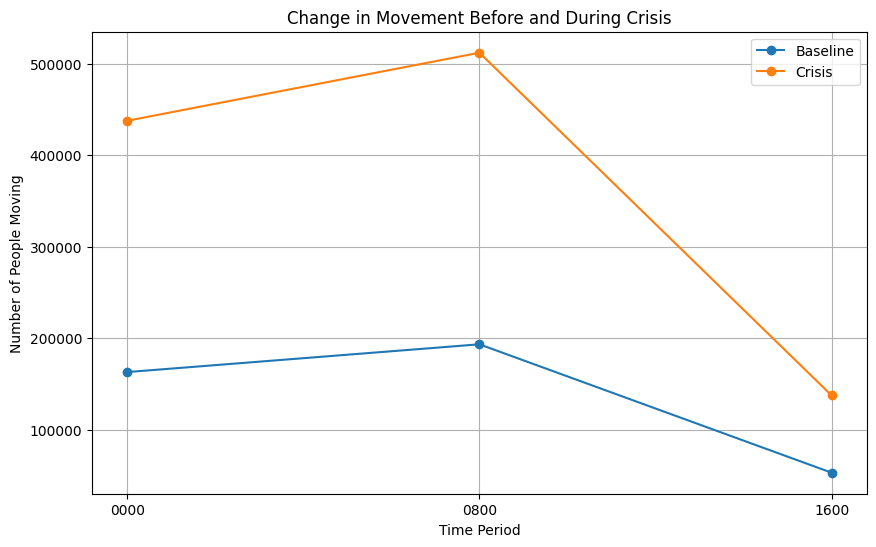

In [114]:
plt.figure(figsize=(10, 6))
plt.plot(summary_df['Time_Period'], summary_df['Baseline: People Moving'], marker='o', label='Baseline')
plt.plot(summary_df['Time_Period'], summary_df['Crisis: People Moving'], marker='o', label='Crisis')
plt.xlabel('Time Period')
plt.ylabel('Number of People Moving')
plt.title('Change in Movement Before and During Crisis')
plt.legend()
plt.grid()
plt.show()

This line plot suggests unexpected behaviour where mobility rose instead of reducing during the crisis. 

#### Validate the Increase in Movement
Double-check if the calculations for Baseline: People Moving and Crisis: People Moving are correct.

In [118]:
# Verify total counts for a few rows
print(cleaned_df.head(10)[['Baseline: People Moving', 'Crisis: People Moving']])


   Baseline: People Moving  Crisis: People Moving
0                       14                     30
1                       11                     24
2                       17                     45
3                       14                     31
4                       13                     38
5                       12                     28
6                       34                     32
7                       14                     45
8                       22                     56
9                       17                     34


#### Look at Trends Over Days
Since we combined 7 days of data, let's aggregate the data per day to identify patterns across each day and period.

In [122]:
# Extract Day information from Time_Period if applicable
cleaned_df['Day'] = cleaned_df.index // (len(combined_df) // 7)  # Assuming ~7 days
summary_daily = cleaned_df.groupby(['Day', 'Time_Period']).agg({
    'Baseline: People Moving': 'sum',
    'Crisis: People Moving': 'sum'
}).reset_index()

# Recalculate reduction
summary_daily['Reduction (%)'] = (
    (summary_daily['Baseline: People Moving'] - summary_daily['Crisis: People Moving']) /
    summary_daily['Baseline: People Moving']
) * 100

# Display summary
print("Daily Trends in Movement Data:")
print(summary_daily)


Daily Trends in Movement Data:
    Day Time_Period  Baseline: People Moving  Crisis: People Moving  \
0     0        0000                    26456                  74316   
1     0        0800                    30257                  84761   
2     0        1600                     3234                   8219   
3     1        0000                    25556                  70679   
4     1        0800                    29374                  80097   
5     1        1600                     4957                  15283   
6     2        0000                    22465                  67321   
7     2        0800                    26016                  78234   
8     2        1600                     8833                  24158   
9     3        0000                    28957                  70398   
10    3        0800                    25260                  58145   
11    3        1600                     4407                  14971   
12    4        0000                    25754  

# Analyse Specific Routes or Areas
Break down the data further by x0, y0 (origin) and x1, y1 (destination) to see if specific routes have more movement increases.

In [125]:
# Find top 5 routes by Crisis movement
top_routes = cleaned_df.groupby(['x0', 'y0', 'x1', 'y1']).agg({
    'Crisis: People Moving': 'sum'
}).sort_values(by='Crisis: People Moving', ascending=False).head(5).reset_index()

print("Top 5 Routes by Movement During Crisis:")
print(top_routes)


Top 5 Routes by Movement During Crisis:
         x0         y0        x1         y1  Crisis: People Moving
0  65.77637  11.766699  65.77637  11.849388                  31047
1  65.77637  11.849388  65.77637  11.766699                  31002
2  65.68848  10.687874  65.68848  10.771111                  11923
3  65.68848  10.771111  65.68848  10.687874                  11529
4  65.77637  11.766699  65.86426  11.766699                  11145


#### Reassess Visualisation
We can use a stacked bar chart to compare baseline vs crisis movements across all Time_Periods.

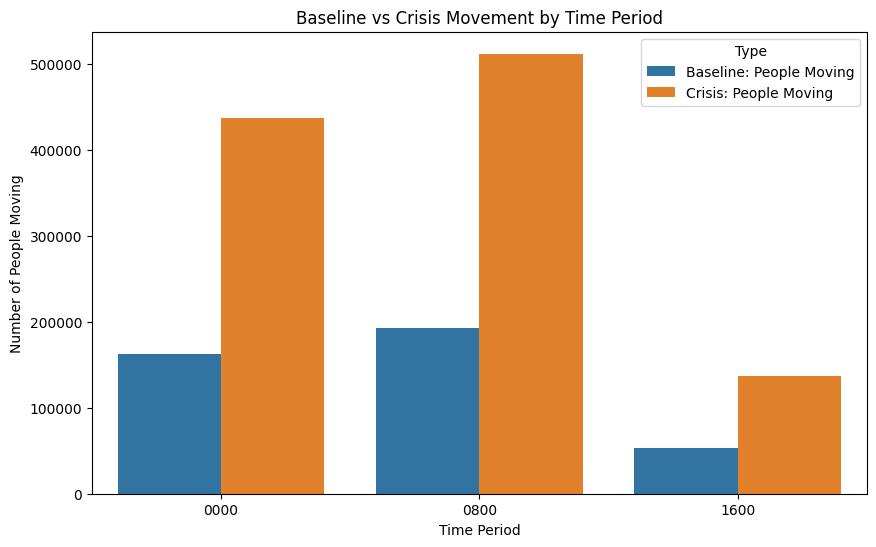

In [128]:
import seaborn as sns

plt.figure(figsize=(10, 6))
summary_melted = summary_df.melt(id_vars='Time_Period', value_vars=['Baseline: People Moving', 'Crisis: People Moving'],
                                 var_name='Type', value_name='People Moving')

sns.barplot(x='Time_Period', y='People Moving', hue='Type', data=summary_melted)
plt.title('Baseline vs Crisis Movement by Time Period')
plt.ylabel('Number of People Moving')
plt.xlabel('Time Period')
plt.show()


Looks like the calculations are correct and this is indeed a case where mobility numbers rose during the crisis, instead of decreasing.

#### 1. Key Observations

#### Daily Trends

1. Movement Increase: The "Crisis: People Moving" consistently surpasses the baseline across almost all days and time periods.
2. High Negative Reduction Percentages:
   - Reduction percentages like -200% or lower on specific days (e.g., Day 1 and Day 6) and time slots suggest substantial increases during the crisis.
   - Evening time periods (1600) generally report higher negative reductions, indicating a more significant rise in movement compared to morning or   midnight periods.

#### Top Routes by Movement


1. Most Frequent Routes:
    - The top routes predominantly occur between the same origin and destination points, likely indicating circular routes or repeated movements.
    - For example:
        - (65.77637, 11.766699 ↔ 65.849388) routes dominate the top positions with over 30,000 people moving.
        - This trend suggests heightened activity or localised movement clusters

#### Insights and Potential Causes

1. Increased Local Movement:
    - The surge in movement may be due to local migration, panic movement, or operational shifts during the crisis (e.g., increased supply chain activities, evacuation).

2. Route Symmetry and Circular Patterns:
    - Repeated movements on short routes indicate possible logistical operations or local commutes.

3. Specific Time Trends:
    - Evening slots (1600) appear to show the largest percentage increases, possibly reflecting the end-of-day movement or traffic peaks.

# Visualise Differences

Use bar charts to visualise areas where mobility remains high or low.

#### Difference Calculation

In [240]:
# Calculate the difference and percentage difference
cleaned_df['Mobility_Difference'] = cleaned_df['Crisis: People Moving'] - cleaned_df['Baseline: People Moving']
cleaned_df['Mobility_Percent_Change'] = ((cleaned_df['Crisis: People Moving'] - cleaned_df['Baseline: People Moving']) / 
                                            cleaned_df['Baseline: People Moving']) * 100

# Preview the data
print(cleaned_df[['x0', 'y0', 'Crisis: People Moving', 'Baseline: People Moving', 
                     'Mobility_Difference', 'Mobility_Percent_Change']].head())


          x0        y0  Crisis: People Moving  Baseline: People Moving  \
0  62.788086  8.425543                     30                       14   
1  62.788086  8.425543                     24                       11   
2  62.788086  8.425543                     45                       17   
3  62.788086  8.425543                     31                       14   
4  62.788086  9.350634                     38                       13   

   Mobility_Difference  Mobility_Percent_Change  
0                   16               114.285714  
1                   13               118.181818  
2                   28               164.705882  
3                   17               121.428571  
4                   25               192.307692  


### Bar Chart for Mobility Change

Show the top areas with the highest or lowest mobility difference during the crisis.

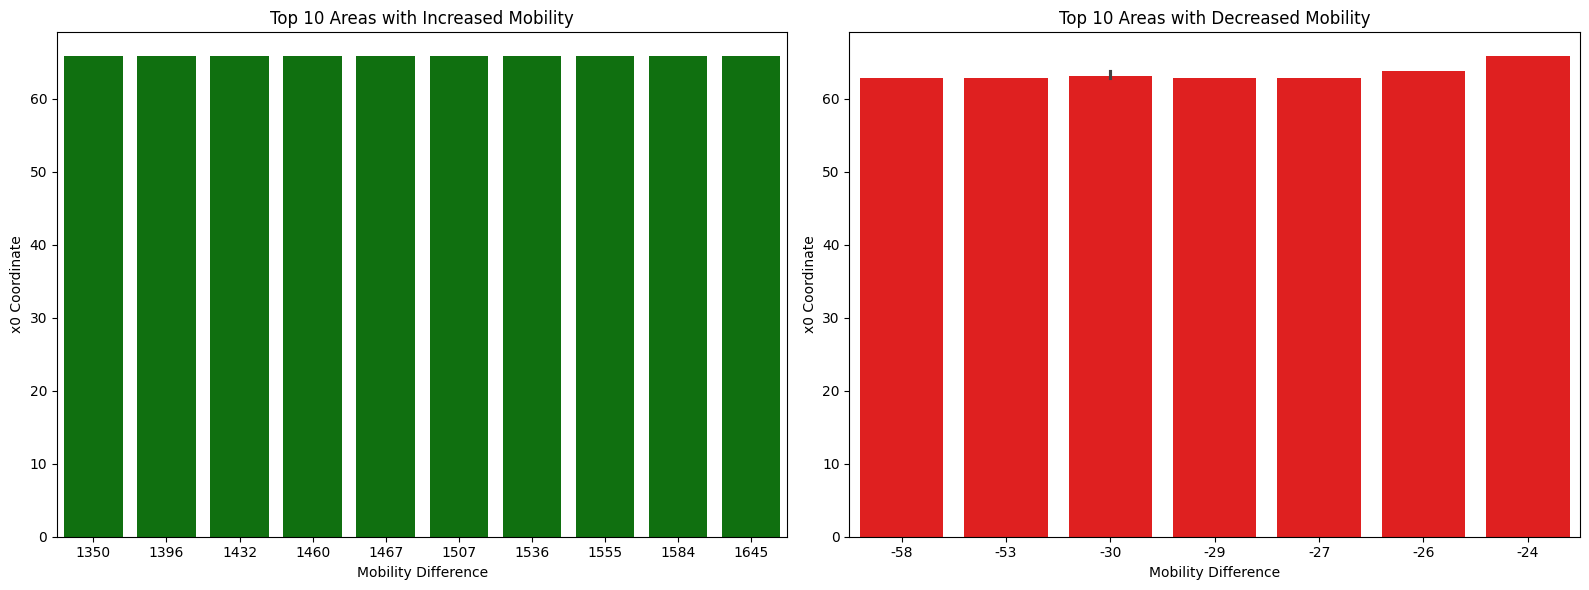

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort data to identify highest and lowest mobility differences
top_positive = cleaned_df.nlargest(10, 'Mobility_Difference')
top_negative = cleaned_df.nsmallest(10, 'Mobility_Difference')

# Plot Top 10 Increases and Decreases in Mobility
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Positive Differences
sns.barplot(data=top_positive, x='Mobility_Difference', y='x0', ax=ax[0], color='green')
ax[0].set_title('Top 10 Areas with Increased Mobility')
ax[0].set_xlabel('Mobility Difference')
ax[0].set_ylabel('x0 Coordinate')

# Negative Differences
sns.barplot(data=top_negative, x='Mobility_Difference', y='x0', ax=ax[1], color='red')
ax[1].set_title('Top 10 Areas with Decreased Mobility')
ax[1].set_xlabel('Mobility Difference')
ax[1].set_ylabel('x0 Coordinate')

plt.tight_layout()
plt.show()


Bar Chart Interpretation: 
 - The left plot highlights areas where movement increased, and the right plot shows areas with the sharpest decreases.

# Vulnerability Analysis

To identify areas where mobility reduction is minimal (low percentage reduction) and flag them as "vulnerable" or "high risk", we can follow these steps:

### Define the Threshold for Vulnerability

We can define a threshold for low percentage reduction in mobility to flag areas as vulnerable. For example, if the percentage reduction is below a certain threshold (e.g., less than 10% reduction), we consider the area vulnerable or at high risk.

### Calculate the Vulnerability flag

We will calculate the percentage reduction (Mobility_Percent_Change), and then flag the rows where this reduction is minimal.

In [215]:
# Define the threshold for minimal reduction (adjust the threshold as needed)
threshold = 10  # For example, flag areas with < 10% reduction as vulnerable

# Flag areas with minimal mobility reduction (vulnerable areas)
cleaned_df['Vulnerability_Flag'] = cleaned_df['Mobility_Percent_Change'].apply(
    lambda x: 'High Risk' if x > -threshold else 'Low Risk'
)

# Preview the data with vulnerability flag
print(cleaned_df[['x0', 'y0', 'Mobility_Percent_Change', 'Vulnerability_Flag']].head())


          x0        y0  Mobility_Percent_Change Vulnerability_Flag
0  62.788086  8.425543               114.285714          High Risk
1  62.788086  8.425543               118.181818          High Risk
2  62.788086  8.425543               164.705882          High Risk
3  62.788086  8.425543               121.428571          High Risk
4  62.788086  9.350634               192.307692          High Risk


### Visualise Vulnerability on a Map

We can use a map to visualise the flagged vulnerable areas. The areas with minimal reduction will be marked as "High Risk" or "Vulnerable."

In [ ]:
# Create a Folium map centred around the average coordinates
map_center = [cleaned_df['y0'].mean(), cleaned_df['x0'].mean()]
vulnerability_map = folium.Map(location=map_center, zoom_start=6)

# Add points to the map for high-risk areas (vulnerable)
for _, row in cleaned_df.iterrows():
    # Use different colours based on the vulnerability flag
    color = 'red' if row['Vulnerability_Flag'] == 'High Risk' else 'blue'
    
    folium.CircleMarker(
        location=[row['y0'], row['x0']],
        radius=5,
        color=color,
        fill=True,
        fill_opacity=0.7,
        popup=f"Baseline: {row['Baseline: People Moving']}<br>"
              f"Crisis: {row['Crisis: People Moving']}<br>"
              f"Percent Change: {row['Mobility_Percent_Change']}<br>"
              f"Vulnerability: {row['Vulnerability_Flag']}"
    ).add_to(vulnerability_map)

# Save and display the map
vulnerability_map.save('vulnerability_map.html')
vulnerability_map


Interpretation:
- The threshold is set to 10% for vulnerability. Areas with a percentage reduction greater than 10% are considered "High Risk".

Colour Coding:
 - Red indicates High Risk or vulnerable areas (where mobility reduction is minimal).
 - Blue indicates areas not flagged as vulnerable

Recommendations:

1. Targeted Interventions: Focus on vulnerable regions (with minimal mobility reduction) to understand the cause behind the continued movement and whether it represents a lack of crisis adaptation or resilience.

2. Monitor High-Risk Areas: Ensure that areas with the lowest mobility reductions are given attention in terms of public health and crisis management policies. These areas may require additional interventions or support.

3. Further Analysis: Investigate why certain routes experienced high movement even during the crisis. These corridors could indicate essential services or be hotspots requiring special attention.

4. Review Response Strategies: Evaluate if the crisis response is sufficiently impacting movement across all regions. Identify why some regions experienced a minimal reduction in mobility, potentially pointing to weaknesses in response measures.

